# CH 5 Finding Road Markings Using OpenCV

- Why OpenCV: Preprocess image
- Why Deep Learning: One of many techniques to use. 
- Why matplotlib: To visualize image 
- Project: Identify road markings in a picture or video
- Why this project? We as humans can identify road markings but of course, autonomous driving cars cannot. We must build and test DL models for cameras to learn the road markings.

---

## Pipeline 
1. Loading the image using OpenCV
2. Converting the image into grayscale
3. Smoothing the image
4. Canny edge detection
5. Masking the region of interest in an image
6. Applying bitwise_and
7. Implementing the Hough transform
8. Optimizing the detected road markings
9. Detecting road markings in an image
10. Detecting road masking in a video

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def show_image(image):
    cv2.imshow('input_image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

## Loading the image using OpenCV

- OpenCV will automatically convert images to use all 3 color channels
- IMREAD_UNCHANGED ex
    1. Load format is grayscale, apply this parameter within the imread func. **Result image is grayscale**
    2. Load format is grayscale, but don't apply this parameter within the imread func. **Result image is rgb**
    3. Load rgb, apply parameter within the imread func. **Result is rgb**
    4. Load rgb, don't apply parameter within the imread func. **Result is rgb**

In [3]:
save_loaded_images = []

def load_image(image):    

    original_image = cv2.imread(image)
    save_loaded_images.append(original_image)
    # show_image(original_image)

    return save_loaded_images 

save_loaded_images = []

In [4]:
picture = 'imgs/input/bookImage.png'
# picture = 'imgs/testDataSetImage1.png'
# picture = 'imgs/testDataSetImage1-resized.png'
# picture = 'imgs/testDataSetImage2.png'
# picture = 'imgs/testDataSetImage2-resized.png'

images = load_image(picture)


---

## Converting the image into grayscale
- RGB is a three-channel color image w/ each pixel in the image being composed of the three
- Grayscale is a one-channel color image with a value from 0 (black) - 255 (white)
- Why convert from RGB to Grayscale
    1. Faster to process (a single-channel image)
    2. Less computationally exspensive to process (a single-channel image)

In [5]:
save_grayscaled_images = []

def convert_to_grayscale(image):
    
    gray_conversion = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    save_grayscaled_images.append(gray_conversion)
    # show_image(gray_conversion)
    
    return save_grayscaled_images

save_grayscaled_images = []

In [6]:
# print(type(images))
for image in images:
    # print(image)
    lanelines_image =  np.copy(image)
    # print(lanelines_image)
    gray_scale_images = convert_to_grayscale(lanelines_image)
gray_scale_images

[array([[179, 179, 177, ..., 204, 204, 204],
        [176, 176, 174, ..., 202, 202, 202],
        [176, 176, 174, ..., 202, 202, 202],
        ...,
        [109, 109, 107, ..., 107, 107, 107],
        [110, 110, 108, ..., 109, 109, 109],
        [110, 110, 108, ..., 109, 109, 109]], dtype=uint8)]

---
## Smoothing the image

In [7]:
save_smoothed_images = []

def smooth_image(image):
    blur_conversion = cv2.GaussianBlur(image, (5, 5), 0)
    # blur_conversion = cv2.medianBlur(image, 9, 0)
    print(blur_conversion)
    save_smoothed_images.append(blur_conversion)
    # show_image(blur_conversion)
    
    return save_smoothed_images 

save_smoothed_images = []

In [8]:
for gray_scale_image in gray_scale_images: 
    smooth_gray_images = smooth_image(gray_scale_image)
smooth_gray_images

[[177 177 176 ... 203 203 203]
 [177 176 175 ... 202 203 203]
 [176 176 175 ... 202 202 202]
 ...
 [109 109 108 ... 108 108 108]
 [109 109 108 ... 108 108 108]
 [110 109 109 ... 109 109 109]]


[array([[177, 177, 176, ..., 203, 203, 203],
        [177, 176, 175, ..., 202, 203, 203],
        [176, 176, 175, ..., 202, 202, 202],
        ...,
        [109, 109, 108, ..., 108, 108, 108],
        [109, 109, 108, ..., 108, 108, 108],
        [110, 109, 109, ..., 109, 109, 109]], dtype=uint8)]

---

## Canny edge detection
- An edge is a region in an image where there is a sharp change in intensity or a sharp change in color between adjacent pixels in an image
- Gradient is the change over a series of pixels (google ex : gradient of image); think of a white box with a gradient (going from left to right) of Black. As we look across the box, px values start at 255 and eventually get to 0
- Canny func computes the gradient in all directions of a blurred image and will trace the strongest gradient as a series of pixels
    - image, threshold_1, threshold_2 
    - A threshold set too high can miss important information
    - A threshold set too low will falsely identify irrelevant information (such as noise) as important
    - Play with threshold 

In [9]:
save_canny_images = []

def canny_edge_detection(image):
    # show_image(image)
    # smooth_grayscaled_image = smooth_image(image)
    # canny_conversion_image = cv2.Canny(smooth_grayscaled_image, 50, 20)
    canny_conversion_image = cv2.Canny(image, 150, 300)
    # print(canny_conversion_image)
    save_canny_images.append(canny_conversion_image)
    # show_image(canny_conversion_image)
    
    return save_canny_images

save_canny_images = []

In [10]:
canny_edge_images = canny_edge_detection(lanelines_image)

for canny_edge_image in canny_edge_images:
    canny_conversion = canny_edge_image
# show_image(canny_conversion)
# for smooth_gray_image in smooth_gray_images:
#     canny_conversion = canny_edge_detection(smooth_gray_image)
    

---

## Masking the region of interest in an image and Applying bitwise_and

- Make this region more prominent
- Creating the region with polygons
    [(a, b)
    (c, b)
    (d, e)]
    - a : bottom right corner; the higher the more to the right the corner will fold out
    - b : height of the image
    - c : bottom left corner; the higher the more to the right the corner will fold in 
    - d :
    - e :

In [11]:
save_masked_images = []

def reg_of_interest(image):
    Image_height = image.shape[0]
    print("Image_height : ", Image_height)
    
    polygons = np.array([
                        [
                            (2000, Image_height),
                            (10, Image_height),
                            (250, 2)
                        ]
                        ])
    print("polygons shape : ", np.shape(polygons))
    image_mask = np.zeros_like(image)
    cv2.fillPoly(image_mask, polygons, 255)
    # show_image(image_mask)
    masking_image = cv2.bitwise_and(image, image_mask)
    
    return masking_image

In [12]:
cropped_image = reg_of_interest(canny_conversion)
show_image(cropped_image)

Image_height :  1073
polygons shape :  (1, 3, 2)


---

## Implementing the Hough transform

- Purpose of this is to detect lines in an image given the region of interest

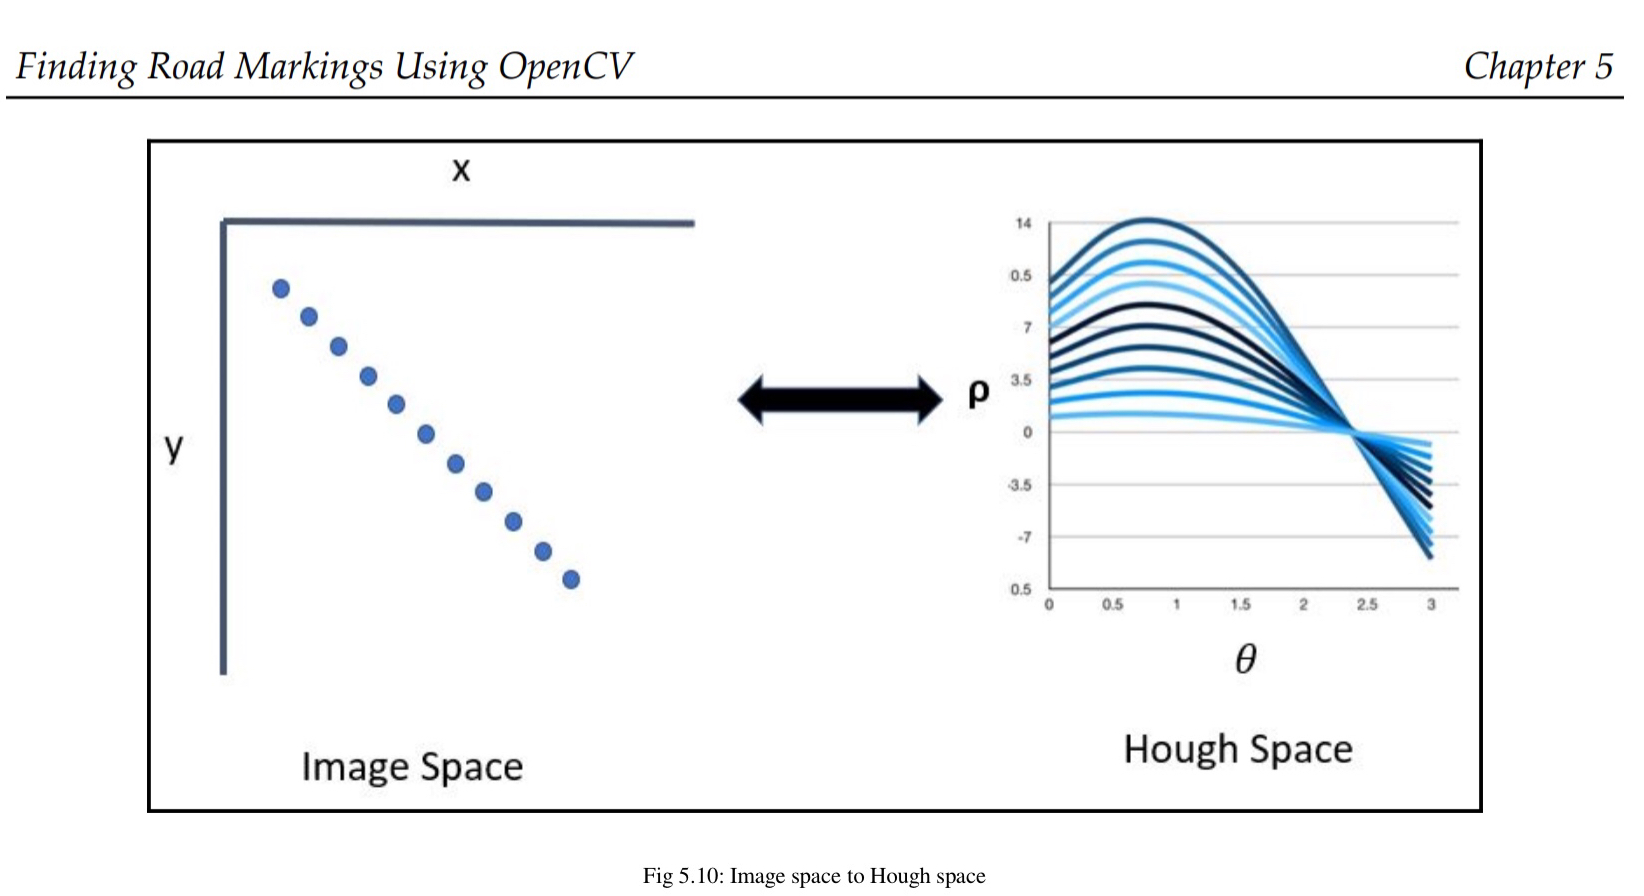

In [13]:
def show_lines(image, lines):
    lines_image = np.zeros_like(image)
    # print(lines_image)
    # print(lines != None)
    if lines is not None:
        # print(lines)
        for line in lines:
            # print(line, np.shape(line), np.shape(line.reshape(4)))
            X1, Y1, X2, Y2 = line.reshape(4)
            # print(X1, Y1, X2, Y2)
            cv2.line(lines_image, (X1, Y1), (X2, Y2), (0, 0, 255), 10)
    return lines_image

In [14]:
lane_lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 10, minLineLength=40, maxLineGap=5)
# show_image(lanelines_image)
linelines_image = show_lines(lanelines_image, lane_lines)
# show_image(images[0])
show_image(linelines_image)
# show_image(images[0])